# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**.
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**.

In [2]:
# Importando o pandas
import pandas as pd

In [3]:
# Importando os datasets
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [4]:
# Visualizando essa base
treino

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Começando a explorar os dados

In [6]:
# Visualizando quantidade de valores vazios
treino.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [7]:
# Calculando % a quantidade de valores vazios
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(20)*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

###### 

### - Vamos analisar essas colunas primeiro:
    - PoolQC, MiscFeature, Alley, Fence
    - MasVnrType, MasVnrArea
    - FireplaceQu
    - LotFrontage
    - Colunas de Garagem
    - Colunas de Porão
    - Electrical system
    - Analisando o restante das colunas de texto

<a id='4top'></a>
- **As primeiras 4 colunas tem mais de 80% dos valores vazios na base de treino.**
    - Ao invés de eliminar essas colunas, vamos entender cada um dos dados:
        - **PoolQC**: **Qualidade** da piscina
            - NA: No Pool
        - **MiscFeature**: Qualquer recurso não considerado nas outras categorias:
            - NA: None
        - **Alley**: Tipo de beco / ruela para acesso a propriedade:
            - NA: No alley access
        - **Fence**: **Qualidade** da cerca:
            - NA: No Fence


- Nesse caso **o NA não é ausência de informação, <font color='red'>ele é uma informação.</font>**


- Podemos entender melhor os dados nessas colunas e principalmente sua **relação com o preço de venda.**

In [11]:
# Podemos substituir os valores vazios nas primeiras colunas por -1
treino[['PoolQC', 'MiscFeature', 'Alley', 'Fence']] = treino[['PoolQC', 'MiscFeature', 'Alley', 'Fence']].fillna(-1)

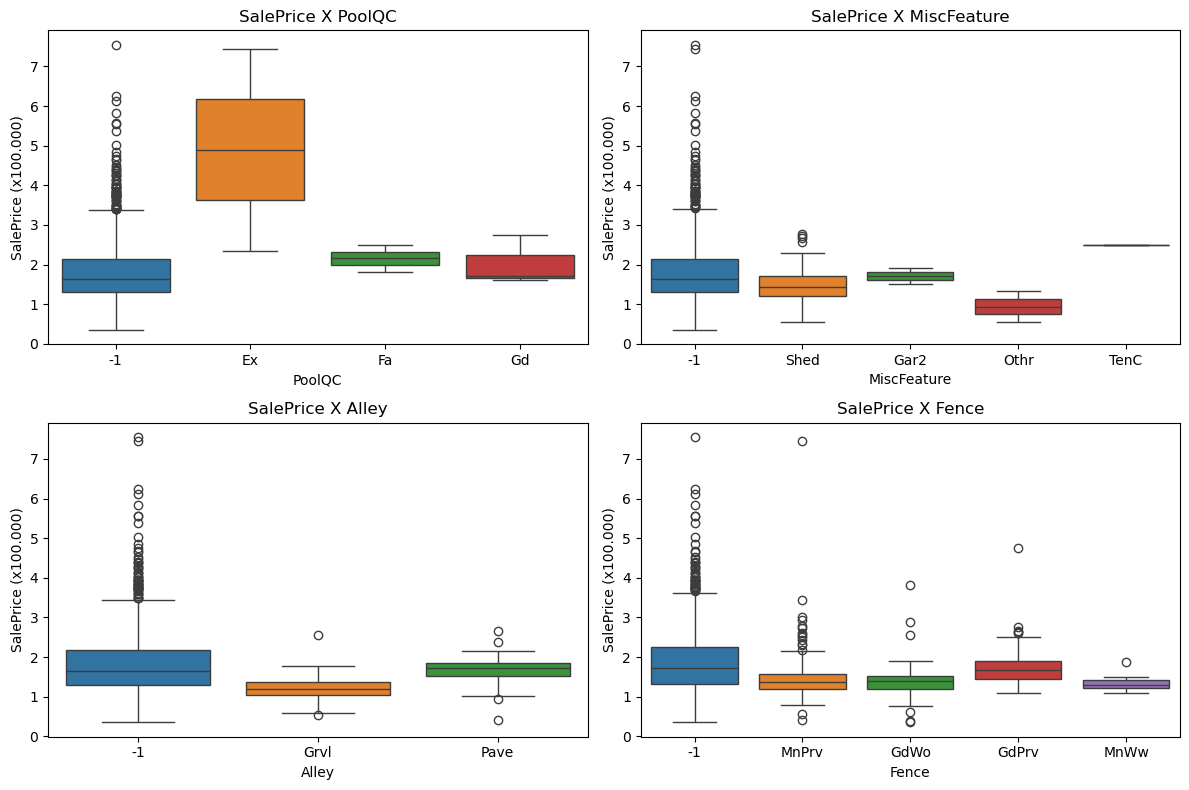

In [12]:
# Visualizando a relação dessas 4 variáveis categóricas com o coluna alvo
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8), tight_layout=True)

sns.boxplot(x=treino.PoolQC, y=treino.SalePrice/100000, hue=treino.PoolQC, legend=False, ax=ax[0,0])
ax[0,0].set_ylabel("SalePrice (x100.000)")
ax[0,0].set_title("SalePrice X PoolQC")

sns.boxplot(x=treino.MiscFeature, y=treino.SalePrice/100000, hue=treino.MiscFeature, legend=False, ax=ax[0,1])
ax[0,1].set_ylabel("SalePrice (x100.000)")
ax[0,1].set_title("SalePrice X MiscFeature")

sns.boxplot(x=treino.Alley, y=treino.SalePrice/100000, hue=treino.Alley, legend=False, ax=ax[1,0])
ax[1,0].set_ylabel("SalePrice (x100.000)")
ax[1,0].set_title("SalePrice X Alley")

sns.boxplot(x=treino.Fence, y=treino.SalePrice/100000, hue=treino.Fence, legend=False, ax=ax[1,1])
ax[1,1].set_ylabel("SalePrice (x100.000)")
ax[1,1].set_title("SalePrice X Fence")

plt.show()

- **Vamos começar a já fazer os mesmos tratamentos para a <font color='blue'>base de teste.</font>** 
    - (depois vamos automatizar esse processo, mas por enquanto vamos fazer o passo a passo de cada etapa).

In [14]:
# Verificando o shape da base de teste
teste.shape

(1459, 80)

In [15]:
# Ajustando também para a base de teste
teste[['PoolQC', 'MiscFeature', 'Alley', 'Fence']] = teste[['PoolQC', 'MiscFeature', 'Alley', 'Fence']].fillna(-1)

In [16]:
# Verificando novamente o shape da base de teste
teste.shape

(1459, 80)

###### 

In [18]:
# Visualizando quantidade de valores vazios
treino.isnull().sum().sort_values(ascending=False).head(15)

MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageFinish     81
GarageYrBlt      81
GarageQual       81
GarageCond       81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtFinType1     37
BsmtCond         37
MasVnrArea        8
Electrical        1
dtype: int64

- Sendo as colunas:
    - **<font color='blue'>MasVnrType:</font>** Tipo de cobertura de alvenaria.
    - **<font color='blue'>MasVnrArea:</font>** Área de cobertura de alvenaria em pés quadrados.

In [20]:
# Verificando os valores vazios nessas colunas
treino.loc[treino.MasVnrType.isnull(), ['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


In [21]:
# Verificando valores vazios de MasVnrType, em que valores de MasVnrArea é maior do que zero
treino.loc[(treino.MasVnrType.isnull()) & (treino.MasVnrArea > 0), ['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
624,NaN,288.0
773,NaN,1.0
1230,NaN,1.0
1300,NaN,344.0
1334,NaN,312.0


In [22]:
# Verificando o valor mais frequente na coluna MasVnrType
treino.MasVnrType.value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [23]:
# Atribuindo a moda para os valores vazios desses casos acima
treino.loc[(treino.MasVnrType.isnull()) & (treino.MasVnrArea > 0), 'MasVnrType'] = treino.MasVnrType.mode()[0]

In [24]:
# Verificando quando o valor de MasVnrArea é igual a 0
treino.loc[treino.MasVnrArea == 0, 'MasVnrType'].value_counts(dropna=False)

MasVnrType
NaN        859
BrkFace      1
Stone        1
Name: count, dtype: int64

In [25]:
# Visualizando os 2 dados em que MasVnrArea é 0, mas MasVnrType não é vazio
treino.loc[(treino.MasVnrArea == 0) & (treino.MasVnrType.notnull()), ['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
688,0.0,BrkFace
1241,0.0,Stone


- Não faz sentido ter esses dados em MasVnrType com MasVnrArea sendo zero. Então podemos fazer 2 suposições:
    - Os dados de MasVnrType foram inputados incorretamente.
    - Ou os dados de MasVnrArea foram inputados incorretamente e/ou perdidos.
- Como não conseguimos pedir informações para esclarecer isso, vamos atribuir a media de MasVnrArea a esses 2 dados.

In [27]:
# Atribuindo a media de MasVnrArea a esses 2 dados
treino.loc[(treino.MasVnrArea == 0) & (treino.MasVnrType.notnull()), 'MasVnrArea'] = treino.MasVnrArea.mean()

In [28]:
# Para os demais dados de MasVnrArea = 0, vamos substituir os dados vazios no MasVnrType por -1
treino.loc[treino.MasVnrArea == 0, 'MasVnrType'] = -1

In [29]:
# Verificando novamente os valores vazios nessas colunas
treino.loc[treino.MasVnrType.isnull(), ['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [30]:
# Atribuindo -1 e 0 para os dados vazias restantes
treino.loc[treino.MasVnrType.isnull(), 'MasVnrType'] = -1
treino.loc[treino.MasVnrArea.isnull(), 'MasVnrArea'] = 0

- O mesmo para **<font color='blue'>teste.</font>**

In [32]:
# Verificando os valores vazios  nessas colunas
teste.loc[teste.MasVnrType.isnull(), ['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
0,NaN,0.0
2,NaN,0.0
4,NaN,0.0
5,NaN,0.0
6,NaN,0.0
...,...,...
1453,NaN,0.0
1454,NaN,0.0
1455,NaN,0.0
1456,NaN,0.0


- Vamos primeiro tratar valores que possuem MasVnrArea, mas MasVnrType está vazio.

In [34]:
# Verificando valores vazios de MasVnrType, em que valores de MasVnrArea é maior do que zero
teste.loc[(teste.MasVnrType.isnull()) & (teste.MasVnrArea > 0), ['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
209,NaN,285.0
992,NaN,1.0
1150,NaN,198.0


In [35]:
# Verificando os valores mais frequentes de MasVnrType
teste.MasVnrType.value_counts()

MasVnrType
BrkFace    434
Stone      121
BrkCmn      10
Name: count, dtype: int64

In [36]:
# Atribuindo a moda para os valores vazios desses casos acima
teste.loc[(teste.MasVnrType.isnull()) & (teste.MasVnrArea > 0), 'MasVnrType'] = teste.MasVnrType.mode()[0]

In [37]:
# Verificando quando o valor de MasVnrArea é igual a 0
teste.loc[teste.MasVnrArea == 0, 'MasVnrType'].value_counts(dropna=False)

MasVnrType
NaN        876
BrkFace      1
Name: count, dtype: int64

In [38]:
# Visualizando o dado em que MasVnrArea é 0, mas MasVnrType não é vazio
teste.loc[(teste.MasVnrArea == 0) & (teste.MasVnrType.notnull()), ['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
859,0.0,BrkFace


In [39]:
# Atribuindo a media de MasVnrArea a esse dado
teste.loc[(teste.MasVnrArea == 0) & (teste.MasVnrType.notnull()), 'MasVnrArea'] = teste.MasVnrArea.mean()

In [40]:
# Para os demais dados de MasVnrArea = 0, vamos substituir os dados vazios no MasVnrType por -1
teste.loc[teste.MasVnrArea == 0, 'MasVnrType'] = -1

In [41]:
# Verificando novamente os valores vazios nessas colunas
teste.loc[teste.MasVnrType.isnull(), ['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


In [42]:
# Atribuindo -1 e 0 para os dados vazias restantes
teste.loc[teste.MasVnrType.isnull(), 'MasVnrType'] = -1
teste.loc[teste.MasVnrArea.isnull(), 'MasVnrArea'] = 0

###### 

- **Agora analisando a coluna <font color='blue'>FireplaceQu</font>**
    - Temos 2 colunas relacionadas a lareiras:
        - **Fireplaces**: Number of fireplaces
        - **FireplaceQu**: Fireplace quality

In [45]:
# Visualizando a quantidade de registros em cada rótulo
treino[['Fireplaces', 'FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            690
1           Gd             324
            TA             259
2           Gd              54
            TA              53
1           Fa              28
            Po              20
            Ex              19
2           Ex               4
            Fa               4
3           Gd               2
            Ex               1
            Fa               1
            TA               1
Name: count, dtype: int64

- Esse NaN também é uma informação, dizendo que **não existe lareira.**

In [47]:
# Ajustando essa coluna
treino['FireplaceQu'] = treino['FireplaceQu'].fillna(-1)

- Novamente fazendo o mesmo para a **<font color='blue'>base de teste.</font>**

In [49]:
# Visualizando a quantidade de registros em cada rótulo
teste[['Fireplaces', 'FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            730
1           Gd             303
            TA             236
2           Gd              58
            TA              39
1           Fa              35
            Po              26
            Ex              18
2           Fa               6
3           Gd               3
            TA               3
2           Ex               1
4           TA               1
Name: count, dtype: int64

In [50]:
# Fazendo a transformação para a base de teste
teste['FireplaceQu'] = teste['FireplaceQu'].fillna(-1)

###### 

### - Visualizando novamente as informações de valores vazios.

In [53]:
# Calculando % a quantidade de valores vazios
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(15)*100

LotFrontage     17.739726
GarageFinish     5.547945
GarageType       5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
KitchenAbvGr     0.000000
BsmtFullBath     0.000000
BedroomAbvGr     0.000000
dtype: float64

In [54]:
# Verificando a quantidade de valores
treino.isnull().sum().sort_values(ascending=False).head(15)

LotFrontage     259
GarageFinish     81
GarageType       81
GarageQual       81
GarageCond       81
GarageYrBlt      81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
Electrical        1
KitchenAbvGr      0
BsmtFullBath      0
BedroomAbvGr      0
dtype: int64

- **<font color='blue'>LotFrontage:</font> Pés lineares (medida de distância) de rua conectados à propriedade.**

In [56]:
# Entendendo os tipos de propriedades que possuem valor nulo
treino.loc[treino.LotFrontage.isnull(),'LotConfig'].value_counts()

LotConfig
Inside     134
Corner      62
CulDSac     49
FR2         14
Name: count, dtype: int64

In [57]:
# Verificando a média por tipo de propriedade
treino.groupby('LotConfig')['LotFrontage'].mean()

LotConfig
Corner     84.039801
CulDSac    59.911111
FR2        63.515152
FR3        70.750000
Inside     67.715686
Name: LotFrontage, dtype: float64

- Nesse caso o valor vazio **parece um erro da base.**

In [59]:
# Substituindo os valores vazios pela média em relação ao LotConfig
treino['LotFrontage'] = treino['LotFrontage'].fillna(treino.groupby('LotConfig')['LotFrontage'].transform('mean'))

- Para a **<font color='blue'>base de teste.</font>**

In [61]:
# Fazendo para a base de teste
teste['LotFrontage'] = teste['LotFrontage'].fillna(teste.groupby('LotConfig')['LotFrontage'].transform('mean'))

###### 

- **Avaliando as <font color='blue'>colunas de garagem:</font>**
    - **GarageType**: Garage location
        - **NA: No Garage**
    - **GarageYrBlt**: Year garage was built
	- **GarageFinish**: Interior finish of the garage
        - **NA: No Garage**		
    - **GarageCars**: Size of garage in car capacity
	- **GarageArea**: Size of garage in square feet
	- **GarageQual**: Garage quality
        - **NA: No Garage**		
	- **GarageCond**: Garage condition
        - **NA: No Garage**		

In [64]:
# Verificando as colunas que possuem garagem no nome
col_garagem = treino.columns[treino.columns.str.contains('Garage')]
col_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [65]:
# Filtrando a base e checando se os dados nulos duma coluna são os mesmos nas demais
treino.loc[treino.GarageCond.isnull(), col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0           0           NaN         NaN           81
Name: count, dtype: int64

- O **NaN** em todas essas colunas significa que **não existe garagem.**

In [67]:
# Podemos selecionar apenas as colunas vazias
treino.loc[treino.GarageType.isnull(), col_garagem[[0, 1, 2, 5, 6]]].head(3)

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN


In [68]:
# Verificando os valores
treino.loc[treino.GarageType.isnull(), col_garagem[[0, 1, 2, 5, 6]]].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond
NaN         NaN          NaN           NaN         NaN           81
Name: count, dtype: int64

In [69]:
# E substituir esses valores por -1
treino.loc[treino.GarageType.isnull(), col_garagem[[0, 1, 2, 5, 6]]] = -1

In [70]:
# Verificando novamente quando a quantidade de carros é igual a 0
treino.loc[treino.GarageCars == 0, col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
-1          -1.0         -1            0           0           -1          -1            81
Name: count, dtype: int64

In [71]:
# Resumindo os valores vazios da base de treino
treino.isnull().sum().sort_values(ascending=False).head(10)

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
Electrical       1
FullBath         0
HalfBath         0
BsmtHalfBath     0
BedroomAbvGr     0
dtype: int64

- Para a **<font color='blue'>base de teste.</font>**

In [73]:
# Verificando os valores
teste.loc[teste.GarageCond.isnull(), col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0.0         0.0         NaN         NaN           76
Detchd      NaN          NaN           1.0         360.0       NaN         NaN            1
                                       NaN         NaN         NaN         NaN            1
Name: count, dtype: int64

- Tratando a linha onde GarageCars é zero e as demais colunas estão vazias.

In [75]:
# Analisando a condição de GarageQual e GarageCond serem nulos
teste.loc[teste.GarageType.isnull(), col_garagem[[0, 1, 2, 5, 6]]].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond
NaN         NaN          NaN           NaN         NaN           76
Name: count, dtype: int64

In [76]:
# E substituir esses valores por -1
teste.loc[teste.GarageType.isnull(), col_garagem[[0, 1, 2, 5, 6]]] = -1

- Agora vamos entender as colunas com tudo vazio nas GarageType = "Detchd"

In [78]:
# Entendendo essas colunas
teste.loc[teste.GarageCond.isnull(), col_garagem]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


- Como a coluna GarageType está preenchida podemos supor que os outros dados estão nulos porque as informações podem ter sido perdidas e/ou não preenchidas.
- Também é possível que, principalmente no caso da linha 1116 - em que apenas essa coluna tem dados, tenha ocorrido um preenchimento incorreto de dados.

- Analisando a coluna GarageYrBlt.

In [81]:
# Vamos verificar os valores quando GarageType == Detchd
teste.loc[teste.GarageType == 'Detchd'].corr(numeric_only=True)['GarageYrBlt'].sort_values(ascending=False).head(3)

GarageYrBlt    1.000000
YearBuilt      0.615951
GarageArea     0.494670
Name: GarageYrBlt, dtype: float64

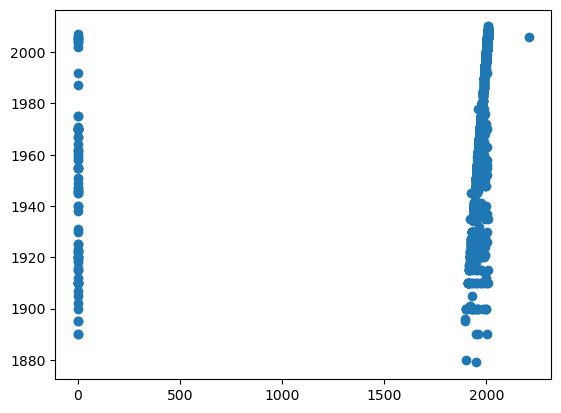

In [82]:
# Visualizando essa correlação
fig, ax = plt.subplots()

ax.scatter(teste.GarageYrBlt, teste.YearBuilt)

plt.show()

Percebe-se claramente 2 fatos:
* há um **ponto fora da curva no gráfico acima**.
* há uma correlação entre as colunas de GarageYrBlt e YearBuilt, mas as casas que não possuem garagem atrapalham um pouco essa visualização.

In [84]:
# Verificando dados com GarageYrBlt maior do que 2030
teste.loc[teste.GarageYrBlt > 2030, teste.columns[teste.columns.str.contains('Y')]]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
1132,2006,2007,2207.0,2007


In [85]:
# Substituindo esse dado pelo ano de YearRemodAdd
teste.loc[teste.GarageYrBlt > 2030, 'GarageYrBlt'] = teste.loc[teste.GarageYrBlt > 2030, 'YearRemodAdd']

In [86]:
# Verificando os valores quando GarageType == Detchd nas casas que possuem garagem
teste2 = teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageYrBlt != -1)]
teste2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
11,1472,160,RM,21.0,1680,Pave,-1,Reg,Lvl,AllPub,...,0,0,-1,-1,-1,0,2,2010,COD,Normal
12,1473,160,RM,21.0,1680,Pave,-1,Reg,Lvl,AllPub,...,0,0,-1,-1,-1,0,3,2010,WD,Normal
31,1492,30,RH,70.0,9800,Pave,-1,Reg,Lvl,AllPub,...,0,0,-1,-1,-1,0,4,2010,WD,Normal
37,1498,160,FV,30.0,3215,Pave,Pave,Reg,Lvl,AllPub,...,0,0,-1,-1,-1,0,4,2010,ConLD,Normal
38,1499,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,...,0,0,-1,-1,-1,0,2,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,2887,30,RM,50.0,7288,Pave,-1,Reg,Lvl,AllPub,...,0,0,-1,-1,-1,0,8,2006,WD,AdjLand
1427,2888,50,RM,50.0,7000,Pave,-1,Reg,Lvl,AllPub,...,0,0,-1,MnPrv,-1,0,5,2006,WD,Normal
1429,2890,30,RM,50.0,7030,Pave,-1,Reg,Lvl,AllPub,...,0,0,-1,MnPrv,-1,0,3,2006,WD,Normal
1430,2891,50,RM,75.0,9060,Pave,-1,Reg,Lvl,AllPub,...,0,0,-1,-1,-1,0,4,2006,WD,Normal


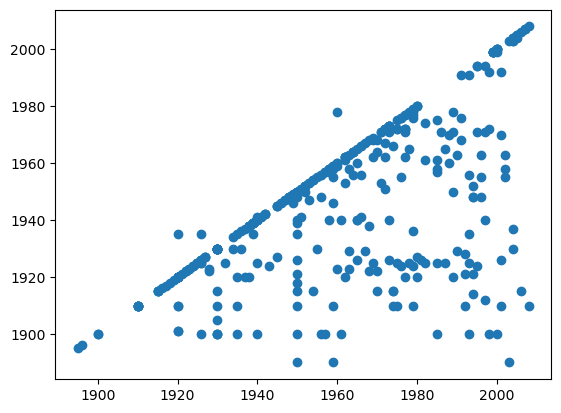

In [87]:
# Visualizando essa correlação
fig, ax = plt.subplots()

ax.scatter(teste2.GarageYrBlt, teste2.YearBuilt)

plt.show()

In [88]:
# Comparando o ano de construção da casa e da garagem
treino.value_counts(treino.GarageYrBlt == treino.YearBuilt)

True     1089
False     371
Name: count, dtype: int64

In [89]:
# Comparando o ano de construção da casa e da garagem
teste.value_counts(teste.GarageYrBlt == teste.YearBuilt)

True     1127
False     332
Name: count, dtype: int64

A maioria das garagens foi construída no mesmo ano de contrução das casas.

In [91]:
# Verificando os valores de construção da casa
teste.loc[teste.GarageYrBlt.isnull(), 'YearBuilt']

666     1910
1116    1923
Name: YearBuilt, dtype: int64

In [92]:
# Substituindo as colunas vazias pelo ano de construção da casa
teste.loc[teste.GarageYrBlt.isnull(), 'GarageYrBlt'] = teste.loc[teste.GarageYrBlt.isnull(), 'YearBuilt']

- E a coluna GarageFinish.

In [94]:
# Verificando os valores mais frequentes quando GarageType == "Detchd"
teste.loc[(teste.GarageType == 'Detchd'),'GarageFinish'].value_counts()

GarageFinish
Unf    365
RFn     15
Fin     10
Name: count, dtype: int64

In [95]:
# Atribuindo esse valor a uma variável
moda_GarageFinish = teste.loc[(teste.GarageType == 'Detchd'),'GarageFinish'].mode()[0]
moda_GarageFinish

'Unf'

In [96]:
# Substituindo valores vazios pelo valor mais frequente
teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageFinish.isnull()), 'GarageFinish'] = moda_GarageFinish

- Fazendo o mesmo para GarageQual e GarageCond.

In [98]:
# Vamos verificar os valores quando GarageType == Detchd
# Para GarageQual
teste.loc[(teste.GarageType == 'Detchd'),'GarageQual'].value_counts()

GarageQual
TA    327
Fa     60
Po      2
Gd      1
Name: count, dtype: int64

In [99]:
# E para GarageCond
teste.loc[(teste.GarageType == 'Detchd'),'GarageCond'].value_counts()

GarageCond
TA    347
Fa     36
Po      5
Gd      1
Ex      1
Name: count, dtype: int64

In [100]:
# Verificando a moda dessas colunas
moda_GarageQual = teste.loc[(teste.GarageType == 'Detchd'),'GarageQual'].mode()[0]
moda_GarageCond = teste.loc[(teste.GarageType == 'Detchd'),'GarageCond'].mode()[0]
print(moda_GarageQual, moda_GarageCond)

TA TA


In [101]:
# E usar esse valor no GarageQual
teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageQual.isnull()), 'GarageQual'] = moda_GarageQual

In [102]:
# E fazer o mesmo para GarageCond
teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageCond.isnull()), 'GarageCond'] = moda_GarageCond

- Para finalizar as colunas de garagem, vamos tratar GarageCars e GarageArea.

In [104]:
# Vamos visualizar a média desses valores quando GarageType == Detchd
media_carros = teste.loc[(teste.GarageType == 'Detchd'),['GarageCars']].mean()
media_area = teste.loc[(teste.GarageType == 'Detchd'),['GarageArea']].mean()
print(media_carros)
print(media_area)

GarageCars    1.519182
dtype: float64
GarageArea    412.202046
dtype: float64


In [105]:
# Como não podemos ter meio carro, vamos arredondar o valor
media_carros = round(media_carros, 0)
media_carros

GarageCars    2.0
dtype: float64

In [106]:
# Para a area também
media_area = round(media_area, 0)
media_area

GarageArea    412.0
dtype: float64

In [107]:
# Verificando novamente quais são as linhas com dados nulos
teste.loc[(teste.GarageCars.isnull()) | (teste.GarageArea.isnull()), col_garagem]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1116,Detchd,1923.0,Unf,NaN,NaN,TA,TA


In [108]:
# Podemos usar esses valores se a média for vazia
teste.loc[teste.GarageCars.isnull(), 'GarageCars'] = media_carros.values
teste.loc[teste.GarageArea.isnull(), 'GarageArea'] = media_area.values

In [109]:
# Checando se deu tudo certo
teste.iloc[[ 1116], 55:70]

,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch
1116,Typ,0,-1,Detchd,1923.0,Unf,2.0,412.0,TA,TA,Y,174,0,212,0


###### 

In [111]:
# Resumindo os valores vazios da base de teste
teste.isnull().sum().sort_values(ascending=False).head(10)

BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType2    42
BsmtFinType1    42
MSZoning         4
BsmtHalfBath     2
BsmtFullBath     2
Utilities        2
Functional       2
dtype: int64

###### 

- **E fazendo a mesma coisa para as <font color='blue'>colunas de Porão:</font>**
    - **NA: No Basement**

- Começando na base de **<font color='blue'>treino.</font>**

In [115]:
# Verificando as colunas que possuem porão no nome e possuem valores vazios
col_porao = treino.columns[treino.columns.str.contains('Bsmt') & (treino.isnull().any())]
col_porao

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], dtype='object')

In [116]:
# Analisando os valores
treino.loc[treino.BsmtFinType2.isnull(), col_porao].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2
NaN       NaN       NaN           NaN           NaN             37
Gd        TA        No            GLQ           NaN              1
Name: count, dtype: int64

- Primeiro tratando o valor BsmtFinType2.

In [118]:
# Verificando os dados na mesma condição
treino.loc[treino.BsmtFinType2.isnull(), ['BsmtFinType2','BsmtFinSF2']].value_counts(dropna=False)

BsmtFinType2  BsmtFinSF2
NaN           0             37
              479            1
Name: count, dtype: int64

In [119]:
# Verificando o valor mais frequente
moda_BsmtFinType2 = treino.BsmtFinType2.mode()[0]
moda_BsmtFinType2

'Unf'

In [120]:
# Substituindo esse valor por Unf
treino.loc[(treino.BsmtFinType2.isnull()) & (treino.BsmtFinSF2 != 0), 'BsmtFinType2'] = moda_BsmtFinType2

- Agora considerando as colunas em que BsmtQual e BsmtCond são vazias.

In [122]:
# Verificando os valores com BsmtQual vazio
treino.loc[treino.BsmtQual.isnull(), col_porao].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2
NaN       NaN       NaN           NaN           NaN             37
Name: count, dtype: int64

In [123]:
# Substituindo os valores sem porão por -1
treino.loc[treino.BsmtQual.isnull(), col_porao] = -1

In [124]:
# Visualizando os valores vazios
treino.isnull().sum().sort_values(ascending=False).head(5)

Electrical      1
BsmtExposure    1
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
dtype: int64

- E agora analisando o BsmtExposure.

In [126]:
# Analisando os valores
treino.loc[treino.BsmtExposure.isnull(), col_porao]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
948,Gd,TA,NaN,Unf,Unf


In [127]:
# E novamente podemos ver o valor mais frequente
treino.BsmtExposure.value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
-1     37
Name: count, dtype: int64

In [128]:
# Criando uma variável
moda_BsmtExposure = treino.BsmtExposure.mode()[0]
moda_BsmtExposure

'No'

In [129]:
# Substituindo esse valor por "No" (mais frequente)
treino.loc[treino.BsmtExposure.isnull(), 'BsmtExposure'] = moda_BsmtExposure

- O mesmo para **<font color='blue'>teste.</font>**

In [131]:
# Visualizando as colunas vazias de porão da base de treino
col_porao

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], dtype='object')

In [132]:
# E as colunas vazias com porão da base de teste
col_porao_teste = teste.columns[teste.columns.str.contains('Bsmt') & (teste.isnull().any())]
col_porao_teste

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [133]:
# Analisando os valores
teste.loc[teste.BsmtQual.isnull(), col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
NaN       NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          0.0           0.0             40
          Fa        No            Unf           0.0         Unf           0.0         173.0      173.0        0.0           0.0              1
          TA        No            Unf           0.0         Unf           0.0         356.0      356.0        0.0           0.0              1
          NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          NaN           NaN              1
                                                NaN         NaN           NaN         NaN        NaN          NaN           NaN              1
Name: count, dtype: int64

- Começando a tratar a coluna BsmtQual.

In [135]:
# Analisando essas linhas
teste.loc[(teste.BsmtQual.isnull()) & (teste.BsmtCond.notnull()), col_porao_teste]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
757,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
758,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0


In [136]:
# Podemos verificar o valor mais frequente
teste.BsmtQual.mode()[0]

'TA'

In [137]:
# E usar esse valor para substituir as linhas acima
teste.loc[(teste.BsmtQual.isnull()) & (teste.BsmtCond.notnull()), 'BsmtQual'] = teste.BsmtQual.mode()[0]

In [138]:
# Visualizando essas linhas
teste.iloc[757:759, 30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
757,TA,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA
758,TA,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA


- Agora tratando as outras colunas.

In [140]:
# Visualizando
teste.loc[teste.BsmtQual.isnull(), col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
NaN       NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          0.0           0.0             40
                                                                                                              NaN           NaN              1
                                                NaN         NaN           NaN         NaN        NaN          NaN           NaN              1
Name: count, dtype: int64

In [141]:
# Substituindo por 0 as colunas numéricas das casas que não tem porão
teste.loc[teste.BsmtQual.isnull(), ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = 0

In [142]:
# E substituindo por -1 as colunas de texto dessas casas
teste.loc[teste.BsmtQual.isnull(), ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = -1

In [143]:
# Visualizando os valores vazios
teste.loc[teste.BsmtQual.isnull(), col_porao_teste].value_counts(dropna=False)

Series([], Name: count, dtype: int64)

- Analisando o restante das colunas de porão.

In [145]:
# Verificando as colunas ainda vazias
teste.isnull().sum().sort_values(ascending=False).head(10)

MSZoning        4
BsmtCond        3
BsmtExposure    2
Functional      2
Utilities       2
Exterior2nd     1
SaleType        1
Exterior1st     1
KitchenQual     1
GarageYrBlt     0
dtype: int64

- E começando por BsmtCond.

In [147]:
# E visualizando BsmtCond na base
teste.loc[teste.BsmtCond.isnull(), col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
Gd        NaN       Mn            GLQ           1044.0      Rec           382.0       0.0        1426.0       1.0           0.0             1
TA        NaN       Av            ALQ           755.0       Unf           0.0         240.0      995.0        0.0           0.0             1
                    No            BLQ           1033.0      Unf           0.0         94.0       1127.0       0.0           1.0             1
Name: count, dtype: int64

In [148]:
# Contando os valores nessa coluna
teste.BsmtCond.value_counts()

BsmtCond
TA    1295
Fa      59
Gd      57
-1      42
Po       3
Name: count, dtype: int64

In [149]:
# Usando a moda para substituir o valor
teste.loc[teste.BsmtCond.isnull(), 'BsmtCond'] = teste.BsmtCond.mode()[0]

- Analisando BsmtExposure.

In [151]:
# Visualizando BsmtExposure
teste.loc[teste.BsmtExposure.isnull(), col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
Gd        TA        NaN           Unf           0.0         Unf           0.0         725.0      725.0        0.0           0.0             1
                                                                                      1595.0     1595.0       0.0           0.0             1
Name: count, dtype: int64

In [152]:
# Trocando pelo valor mais frequente
teste.loc[teste.BsmtExposure.isnull(), 'BsmtExposure'] = teste.BsmtExposure.mode()[0]

- **Voltando para a base de treino:**

In [154]:
# Verificando a quantidade de valores na base de treino
treino.isnull().sum().sort_values(ascending=False).head(5)

Electrical     1
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
dtype: int64

- Avaliando a coluna de <font color='blue'>sistema elétrico.</font>
  - Essa coluna **não deveria aceitar um valor vazio.**

In [156]:
# Visualizando os valores em sistema elétrico
treino.Electrical.value_counts(dropna=False)

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64

- Uma opção seria **pedir essa informação faltante, mas como isso não é possível** podemos:
    - Considerar que ele será igual a maioria.
    - Ou criar um novo rótulo como "não informado".

In [158]:
# Atribuindo para esse valor o valor mais frequente da coluna
treino.loc[treino.Electrical.isnull(), 'Electrical'] = treino.Electrical.mode()[0]

In [159]:
# Verificando valores vazios
treino.isnull().sum().sort_values(ascending=False).head()

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
dtype: int64

- Observe que **a base de treino já foi totalmente tratada.**

- Para a **<font color='blue'>base de teste.</font>**

In [162]:
# Verificando valores vazios
teste.isnull().sum().sort_values(ascending=False).head(10)

MSZoning        4
Functional      2
Utilities       2
Exterior2nd     1
SaleType        1
Exterior1st     1
KitchenQual     1
KitchenAbvGr    0
GarageYrBlt     0
GarageType      0
dtype: int64

- Realizando os mesmos tratamentos que fizemos para a base de treino.

In [164]:
# Verificando valores vazios
teste.isnull().sum().sort_values(ascending=False).head(10)

MSZoning        4
Functional      2
Utilities       2
Exterior2nd     1
SaleType        1
Exterior1st     1
KitchenQual     1
KitchenAbvGr    0
GarageYrBlt     0
GarageType      0
dtype: int64

<a id='restante_teste'></a>
**Analisando o restante da base de teste:**
- **Entendendo essas colunas**
    - **<font color='blue'>MSZoning:</font>** Região onde fica a casa
        - NA: A informação não foi adicionada na base (ausência de informação)
    - **<font color='blue'>Functional:</font>** Funcionalidades da casa
        - NA: A informação não foi adicionada na base (ausência de informação)
        - Presumir típico, a menos que as deduções sejam justificadas
    - **<font color='blue'>Utilities:</font>** Utilidades disponíveis
        - NA: A informação não foi adicionada na base (ausência de informação)

In [166]:
# Verificando os valores em MSZoning
teste.MSZoning.value_counts()

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64

In [167]:
# E usando a moda para substituir os valores
teste.loc[teste.MSZoning.isnull(), 'MSZoning'] = teste.MSZoning.mode()[0]

In [168]:
# Verificando os valores em Utilities
teste.Utilities.value_counts()

Utilities
AllPub    1457
Name: count, dtype: int64

In [169]:
# E usando a moda para substituir os valores
teste.loc[teste.Utilities.isnull(), 'Utilities'] = teste.Utilities.mode()[0]

In [170]:
# Verificando os valores em Functional
teste.Functional.value_counts()

Functional
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: count, dtype: int64

In [171]:
# Novamente utilizando a moda
teste.loc[teste.Functional.isnull(), 'Functional'] = teste.Functional.mode()[0]

In [172]:
# Visualizando as ultimas colunas
print(teste.SaleType.mode()[0])
print(teste.Exterior1st.mode()[0])
print(teste.Exterior2nd.mode()[0])
print(teste.KitchenQual.mode()[0])

WD
VinylSd
VinylSd
TA


In [173]:
# E substituindo esses valores
teste.loc[teste.SaleType.isnull(), 'SaleType'] = teste.SaleType.mode()[0]
teste.loc[teste.Exterior1st.isnull(), 'Exterior1st'] = teste.Exterior1st.mode()[0]
teste.loc[teste.Exterior2nd.isnull(), 'Exterior2nd'] = teste.Exterior2nd.mode()[0]
teste.loc[teste.KitchenQual.isnull(), 'KitchenQual'] = teste.KitchenQual.mode()[0]

In [174]:
# Verificando valores vazios
teste.isnull().sum().sort_values(ascending=False).head()

Id             0
MSSubClass     0
GarageType     0
FireplaceQu    0
Fireplaces     0
dtype: int64

- **Para finalizar, vamos exportar essas duas bases.**

In [176]:
# Exportando a base de treino e teste
treino.to_csv('train_2.csv', index=False)
teste.to_csv('test_2.csv', index=False)